In [ ]:
!pip install fbprophet --verbose

In [13]:
from matplotlib import pyplot as plt
import pandas as pd

In [14]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [5]:
data = 'data/Sample_Data.xls'

In [6]:
df = pd.read_excel(data)

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
print (df.columns.values)

['Row ID' 'Order ID' 'Order Date' 'Ship Date' 'Ship Mode' 'Customer ID'
 'Customer Name' 'Segment' 'Country' 'City' 'State' 'Postal Code' 'Region'
 'Product ID' 'Category' 'Sub-Category' 'Product Name' 'Sales' 'Quantity'
 'Discount' 'Profit']


In [9]:
print ('Strating Date : ' + str(df['Order Date'].min()), '\nEnding Date : ' + str(df['Order Date'].max()))

Strating Date : 2014-01-03 00:00:00 
Ending Date : 2017-12-30 00:00:00


In [10]:
print (df['Category'].unique())

['Furniture' 'Office Supplies' 'Technology']


In [11]:
df_analysis = df[df['Category'] == 'Furniture'][['Sales', 'Order Date']]
df_analysis = df_analysis.groupby('Order Date')['Sales'].sum().reset_index()
df_analysis.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)

In [15]:
model = Prophet()
model.fit(df_analysis)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Sharmo.Sarkar\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [19]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)


In [20]:
print (forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

            ds        yhat  yhat_lower   yhat_upper
974 2018-03-26  911.902679 -388.916424  2157.115277
975 2018-03-27  523.582172 -693.211756  1719.298161
976 2018-03-28  483.837109 -689.306993  1759.629583
977 2018-03-29  691.989480 -512.396670  1826.540936
978 2018-03-30  718.165573 -415.471717  1976.164902


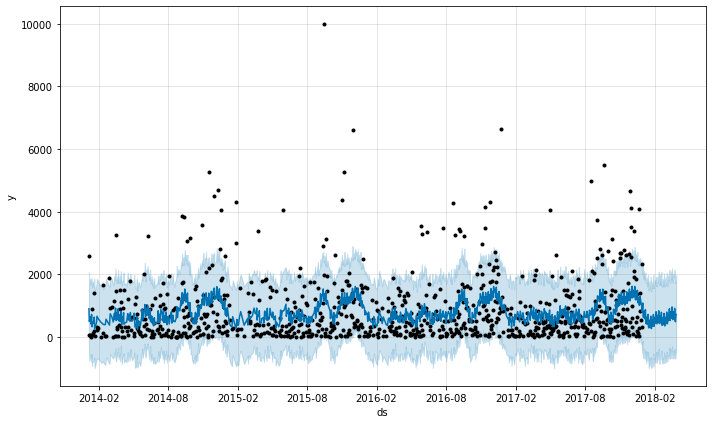

In [21]:
fig1 = model.plot(forecast)

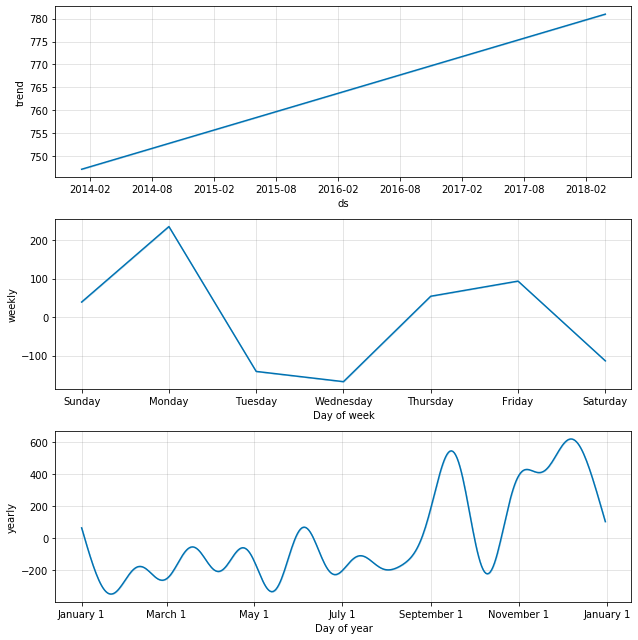

In [22]:
fig2 = model.plot_components(forecast)
